In [ ]:
import numpy

In [ ]:
class LogisticRegressionModel:
  W=0
  def __init__(self, shape):
    self.W = numpy.zeros((shape+1,1))
  
  def sigmoid(self, value):
    return 1/(1+numpy.exp(-value))
  
  def sigmoid_derv(value):
    return self.sigmoid(value)*(1-self.sigmoid(value))

  def fit(self, X, Y, itr=100, const=0.001):
    # augmenting X
    X = numpy.concatenate((numpy.ones((X.shape[0],1)), X), axis=1)
    for i in range(itr):
      self.W = self.W - (const*(numpy.matmul(X.T, self.sigmoid(numpy.matmul(X, self.W)) - Y)))
  
  def predict(self, X):
    # augment X
    X = numpy.concatenate((numpy.ones((X.shape[0],1)), X), axis=1)
    predictions = self.sigmoid(numpy.matmul(X, self.W))
    predictions[predictions < 0.5] = 0
    predictions[predictions >= 0.5] = 1
    return predictions

  def LMS_error(self, X, Y):
    # augment X
    X = numpy.concatenate((numpy.ones((X.shape[0],1)), X), axis=1)
    return numpy.square(numpy.linalg.norm(numpy.matmul(X, self.W) - Y))

In [ ]:
X = numpy.array([[1,0,1], [0,1,1], [1,1,0], [1,1,1], [2,2,2]])
Y = numpy.array([[1],[1],[1],[0],[0]])
lr = LogisticRegressionModel(X.shape[1])

In [ ]:
lr.fit(X, Y, 100, 0.00001)

In [ ]:
test = numpy.array([[0,0,0], [1,1,1], [2,2,2],[10,10,10],[-1,1,-1]])
print(lr.predict(test))

[[1.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [ ]:
def LMS_error(y, y_hat):
  return numpy.square(numpy.linalg.norm(y_hat - y))

In [ ]:
def get_dataset(means, covariance, priors, train_size, test_size, covariance_1=numpy.zeros((1,1))):
  X_train_0 = numpy.random.multivariate_normal(mean=means[0], cov=covariance, size=int(train_size*priors[0]))
  X_test_0 = numpy.random.multivariate_normal(mean=means[0], cov=covariance, size=int(test_size*priors[0]))
  if covariance_1.all() != 0:
    X_train_1 = numpy.random.multivariate_normal(mean=means[1], cov=covariance_1, size=int(train_size*priors[1]))
    X_test_1 = numpy.random.multivariate_normal(mean=means[1], cov=covariance_1, size=int(test_size*priors[1]))
  else:
    X_train_1 = numpy.random.multivariate_normal(mean=means[1], cov=covariance, size=int(train_size*priors[1]))
    X_test_1 = numpy.random.multivariate_normal(mean=means[1], cov=covariance, size=int(test_size*priors[1]))
  X_train = numpy.vstack((X_train_0, X_train_1))
  X_test = numpy.vstack((X_test_0, X_test_1))

  y_train = numpy.vstack((
      numpy.repeat(0, int(train_size*priors[0])).reshape(-1, 1),
      numpy.repeat(1, int(train_size*priors[1])).reshape(-1, 1)
  ))
  y_test = numpy.vstack((
      numpy.repeat(0, int(test_size*priors[0])).reshape(-1, 1),
      numpy.repeat(1, int(test_size*priors[1])).reshape(-1, 1)
  ))
  return X_train, X_test, y_train, y_test

In [ ]:
D = 10
means = [numpy.repeat(0, D).reshape(-1), numpy.repeat(1, D).reshape(-1)]
covariance = numpy.identity(D)
priors = [0.5, 0.5]
train_size, test_size = 2000, 1000
X_train, X_test, y_train, y_test = get_dataset(means, covariance, priors, train_size, test_size)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 10), (2000, 1), (1000, 10), (1000, 1))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Sklearn Logistic Regressor
reg = LogisticRegression().fit(X_train, y_train.reshape(-1))
predict = reg.predict(X_test)
predict[predict < 0.5] = 0
predict[predict >= 0.5] = 1

In [ ]:
# Linear Regression Model
lr = LogisticRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
print("Sklearn Regression Model Accuracy {0:8.2f} test %".format(accuracy_score(y_test.reshape(-1), predict)*100))
print("Sklearn f_1", f1_score(y_test, predict))
print("Logistic Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test.reshape(-1), lr.predict(X_test))*100))
print("Logistic f_1", f1_score(y_test, lr.predict(X_test)))
predict_train = reg.predict(X_train)
predict_train[predict_train < 0.5] = 0
predict_train[predict_train >= 0.5] = 1
print("Sklearn Regression Model Accuracy {0:8.2f} train %".format(accuracy_score(y_train.reshape(-1), predict_train)*100))
print("Sklearn f_1", f1_score(y_train, predict_train))
print("Logistic Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train.reshape(-1), lr.predict(X_train))*100))
print("Logistic f_1", f1_score(y_train, lr.predict(X_train)))

Sklearn Regression Model Accuracy    95.00 test %
Sklearn f_1 0.9500000000000001
Logistic Regression Model Accuracy    95.00 % test
Logistic f_1 0.9500998003992016
Sklearn Regression Model Accuracy    94.65 train %
Sklearn f_1 0.9465267366316842
Logistic Regression Model Accuracy    94.50 % train
Logistic f_1 0.945219123505976


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(y_test, lr.predict(X_test)))

[[474  26]
 [ 24 476]]


In [ ]:
# Create separate datasets for comparison with varying priors
prior_values = numpy.arange(0.1,1,0.1)
accuracy_values_model = []
accuracy_values_sklearn = []
for i in range(len(prior_values)):
  print("Evaluating on prior ({0},{1})".format(round(prior_values[i],1), round(1-prior_values[i], 1)))
  D = 10
  means = [numpy.repeat(0, D).reshape(-1), numpy.repeat(1, D).reshape(-1)]
  covariance = numpy.identity(D)
  priors = [prior_values[i], 1-prior_values[i]]
  train_size, test_size = 4000, 2000
  X_train, X_test, y_train, y_test = get_dataset(means, covariance, priors, train_size, test_size)
  lr = LogisticRegressionModel(X_train.shape[1])
  lr.fit(X_train, y_train)
  reg = LogisticRegression().fit(X_train, y_train.reshape(-1))
  predict = reg.predict(X_test)
  predict[predict < 0.5] = 0
  predict[predict >= 0.5] = 1
  accuracy_values_sklearn.append(accuracy_score(y_test.reshape(-1), predict))
  accuracy_values_model.append(round(accuracy_score(y_test, lr.predict(X_test)), 3))

Evaluating on prior (0.1,0.9)
Evaluating on prior (0.2,0.8)
Evaluating on prior (0.3,0.7)
Evaluating on prior (0.4,0.6)
Evaluating on prior (0.5,0.5)
Evaluating on prior (0.6,0.4)
Evaluating on prior (0.7,0.3)
Evaluating on prior (0.8,0.2)
Evaluating on prior (0.9,0.1)


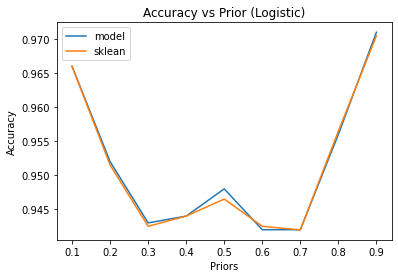

In [ ]:
import matplotlib.pyplot as plt
plt.plot(prior_values, accuracy_values_model, label="model")
plt.plot(prior_values, accuracy_values_sklearn, label="sklean")
plt.xlabel("Priors")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Prior (Logistic)")
plt.legend()
plt.show()

In [ ]:
accuracy_values_model

[0.966, 0.952, 0.943, 0.944, 0.948, 0.942, 0.942, 0.956, 0.971]

In [ ]:
D = 2
means = [numpy.repeat(0, D).reshape(-1), numpy.repeat(1, D).reshape(-1)]
covariance = numpy.identity(D)
priors = [0.5, 0.5]
train_size, test_size = 2000, 1000
X_train, X_test, y_train, y_test = get_dataset(means, covariance, priors, train_size, test_size)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 2), (2000, 1), (1000, 2), (1000, 1))

In [ ]:
lr = LogisticRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

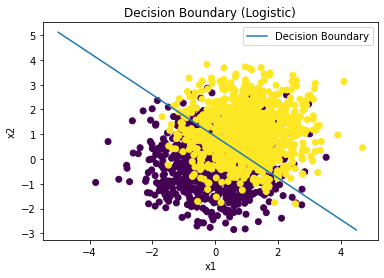

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
w_0 = lr.W[0]
w = lr.W[1:]
x = numpy.arange(-5,5,0.5)
y = (-w_0 -(x*w[0]))/w[1]
plt.plot(x,y, label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary (Logistic)")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Logistic Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Logistic f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print("Logistic Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Logistic f_1", f1_score(y_train, lr.predict(X_train)))

Logistic Regression Model Accuracy    75.90 % test
Logistic f_1 0.7587587587587586
[[380 120]
 [121 379]]
Logistic Regression Model Accuracy    76.35 % train
Logistic f_1 0.7629072681704261


#1(c) Logistic Regression

In [ ]:
D = 2
means = [numpy.repeat(0, D).reshape(-1), numpy.repeat(0, D).reshape(-1)]
covariances = [numpy.identity(D) , numpy.array([[1,0.9],[0.9,1]])]
priors = [0.5, 0.5]
train_size, test_size = 2000, 1000
X_train, X_test, y_train, y_test = get_dataset(means, covariances[0], priors, train_size, test_size, covariances[1])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 2), (2000, 1), (1000, 2), (1000, 1))

In [ ]:
# Logistic Regression Model
lr = LogisticRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:
print("Logistic Regression Model Accuracy {0:8.2f} %".format(accuracy_score(y_test, lr.predict(X_test))*100))

Logistic Regression Model Accuracy    51.30 %


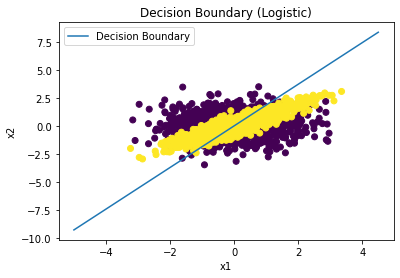

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
w_0 = lr.W[0]
w = lr.W[1:]
x = numpy.arange(-5,5,0.5)
y = (-w_0 -(x*w[0]))/w[1]
plt.plot(x,y, label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary (Logistic)")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Logistic Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Logistic f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print("Logistic Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Logistic f_1", f1_score(y_train, lr.predict(X_train)))

Logistic Regression Model Accuracy    51.30 % test
Logistic f_1 0.5230166503428012
[[246 254]
 [233 267]]
Logistic Regression Model Accuracy    50.85 % train
Logistic f_1 0.5131253095591877


In [ ]:
X_sqr = X_train ** 2
X_sqr[:,0].reshape(-1).shape, numpy.prod(X_train, axis=1).shape, X_train[:,0].shape

((2000,), (2000,), (2000,))

In [ ]:
# feature transformation
X_train_sqr = X_train ** 2
X_test_sqr = X_test ** 2
X_train_tf = numpy.concatenate((X_train_sqr[:,0].reshape(-1,1), X_train_sqr[:,1].reshape(-1,1), numpy.prod(X_train, axis=1).reshape(-1,1), X_train[:,0].reshape(-1,1), X_train[:,1].reshape(-1,1)), axis=1)
X_test_tf = numpy.concatenate((X_test_sqr[:,0].reshape(-1,1), X_test_sqr[:,1].reshape(-1,1), numpy.prod(X_test, axis=1).reshape(-1,1), X_test[:,0].reshape(-1,1), X_test[:,1].reshape(-1,1)), axis=1)

In [ ]:
# Logistic Regression Model
lr = LogisticRegressionModel(X_train_tf.shape[1])
lr.fit(X_train_tf, y_train)

In [ ]:
print("Logistic Regression Model Accuracy {0:8.2f} %".format(accuracy_score(y_test, lr.predict(X_test_tf))*100))

Logistic Regression Model Accuracy    78.70 %


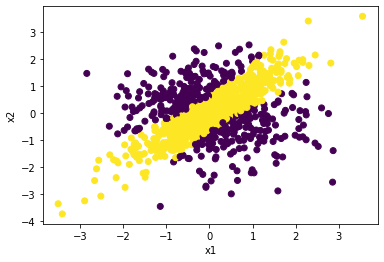

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], c=lr.predict(X_test_tf))
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Logistic Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test_tf))*100))
print("Logistic f_1", f1_score(y_test, lr.predict(X_test_tf)))
print(confusion_matrix(y_test, lr.predict(X_test_tf)))
print("Logistic Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train_tf))*100))
print("Logistic f_1", f1_score(y_train, lr.predict(X_train_tf)))

Logistic Regression Model Accuracy    78.70 % test
Logistic f_1 0.8093106535362578
[[335 165]
 [ 48 452]]
Logistic Regression Model Accuracy    75.75 % train
Logistic f_1 0.7871873628784555


#1(d)

In [ ]:
D = 2
means = [numpy.array([[3,6]]).reshape(-1), numpy.array([[3,-2]]).reshape(-1)]
covariances = [numpy.array([[0.5,0],[0,2]]) , numpy.array([[2,0],[0,2]])]
priors = [0.5, 0.5]
train_size, test_size = 4000, 2000
X_train, X_test, y_train, y_test = get_dataset(means, covariances[0], priors, train_size, test_size, covariances[1])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000, 2), (4000, 1), (2000, 2), (2000, 1))

In [ ]:
lr = LogisticRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:
print("Logistic Regression Model Accuracy {0:8.2f} %".format(accuracy_score(y_test, lr.predict(X_test))*100))

Logistic Regression Model Accuracy    99.65 %


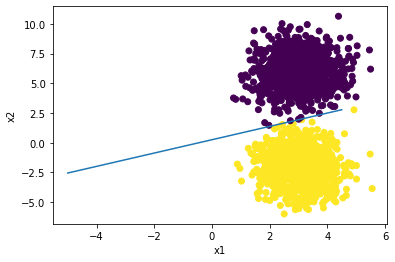

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], c=lr.predict(X_test))
w_0 = lr.W[0]
w = lr.W[1:]
x = numpy.arange(-5,5,0.5)
y = (-w_0 -(x*w[0]))/w[1]
plt.plot(x,y, label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Logistic Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Logistic f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print("Logistic Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Logistic f_1", f1_score(y_train, lr.predict(X_train)))

Logistic Regression Model Accuracy    99.65 % test
Logistic f_1 0.9964947421131698
[[998   2]
 [  5 995]]
Logistic Regression Model Accuracy    99.62 % train
Logistic f_1 0.9962490622655664


#2(a) Logistic

In [ ]:
data = numpy.loadtxt("german.data-numeric", dtype=numpy.float128)

In [ ]:
X = data[:,:-1]
y[y==1]=0
y[y==2]=1
y = data[:,-1].reshape(-1,1)
X.shape, y.shape

((1000, 24), (1000, 1))

## 80, 20 split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Logistic Regression Model
lr = LogisticRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:
print("Logistic Regression Model Accuracy {0:8.2f} %".format(accuracy_score(y_test, lr.predict(X_test))*100))

Logistic Regression Model Accuracy    70.00 %


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Logistic Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Logistic f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print("Logistic Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Logistic f_1", f1_score(y_train, lr.predict(X_train)))

Logistic Regression Model Accuracy    70.00 % test
Logistic f_1 0.8235294117647058
[[140   0]
 [ 60   0]]
Logistic Regression Model Accuracy    70.00 % train
Logistic f_1 0.8235294117647058


## 70, 30 split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Logistic Regression Model
lr = LogisticRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:
print("Logistic Regression Model Accuracy {0:8.2f} %".format(accuracy_score(y_test, lr.predict(X_test))*100))

Logistic Regression Model Accuracy    68.67 %


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Logistic Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Logistic f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print("Logistic Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Logistic f_1", f1_score(y_train, lr.predict(X_train)))

Logistic Regression Model Accuracy    68.67 % test
Logistic f_1 0.8142292490118578
[[206   0]
 [ 94   0]]
Logistic Regression Model Accuracy    70.57 % train
Logistic f_1 0.8274706867671692


#3(b)

In [ ]:
import pandas
import numpy
dataset = pandas.read_csv("train.csv")

In [ ]:
dataset.replace('',numpy.nan, inplace= True)
dataset.dropna(inplace=True)

In [ ]:
X = dataset.iloc[:,2:].values
y = dataset["target"].values
y = y.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(X)
X = st.transform(X)
X = X.astype("float128")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((476169, 57), (119043, 57), (476169, 1), (119043, 1))

In [ ]:
from collections import Counter
y_count = Counter(y_train.reshape(-1))
y_count

Counter({0: 458893, 1: 17276})

In [ ]:
lr = LogisticRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:
y_count = Counter(y_test.reshape(-1))
y_count

Counter({0: 114625, 1: 4418})

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Logistic Regression Model Accuracy(Train) {0:8.2f} %".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Logistic Regression Model Accuracy(Test) {0:8.2f} %".format(accuracy_score(y_test, lr.predict(X_test))*100))
print(confusion_matrix(y_test, lr.predict(X_test)))

Logistic Regression Model Accuracy(Train)    95.14 %
Logistic Regression Model Accuracy(Test)    95.06 %
[[113019   1606]
 [  4278    140]]


## Undersampling

In [ ]:
import pandas
dataset = pandas.read_csv("train.csv")

In [ ]:
dataset_0 = dataset[dataset["target"]==0]
dataset_1 = dataset[dataset["target"]==1]
dataset_0.shape, dataset_1.shape

((573518, 59), (21694, 59))

In [ ]:
dataset_0 = dataset_0[:len(dataset_1)]
dataset = pandas.concat([dataset_0, dataset_1], axis=0)
dataset

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595006,1487473,1,5,1,7,0,3,0,0,1,0,0,0,0,0,0,8,0,1,0,0.6,0.4,1.537652,11,0,0,0,1,5,1,1,2,1,104,1,0.424264,1.269111,0.384708,3.162278,0.5,0.1,0.5,3,4,9,1,10,2,9,10,1,5,7,0,1,1,0,0,0
595046,1487566,1,1,1,5,0,0,0,0,1,0,0,0,0,0,0,4,0,0,1,0.3,0.4,-1.000000,11,0,-1,0,-1,15,1,1,2,1,5,2,0.424264,0.756979,0.400000,2.000000,0.3,0.4,0.6,1,1,8,2,9,5,9,9,2,1,5,0,1,0,0,0,0
595099,1487716,1,0,1,6,1,0,0,1,0,0,0,0,0,0,0,9,0,1,0,0.9,0.3,0.711952,11,1,0,0,1,7,1,1,1,1,104,3,0.400000,0.970654,0.372424,3.464102,0.5,0.4,0.6,2,2,8,2,8,4,10,3,2,1,6,0,1,1,0,0,0
595113,1487748,1,0,2,2,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0.6,0.1,0.577170,7,1,1,0,0,11,1,0,2,1,104,2,0.316228,0.876295,0.320780,3.741657,0.5,0.2,0.6,3,0,9,3,10,4,11,5,0,4,4,0,0,1,0,1,0


In [ ]:
X = dataset.iloc[:,2:].values
y = dataset["target"].values
y = y.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(X)
X = st.transform(X).astype("float128")

## 80,20 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34710, 57), (8678, 57), (34710, 1), (8678, 1))

In [ ]:
from collections import Counter
y_count = Counter(y_train.reshape(-1))
y_count

Counter({0: 17399, 1: 17311})

In [ ]:
lr = LogisticRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:
print("Linear Regression Model Accuracy(Train) {0:8.2f} %".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Linear Regression Model Accuracy(Test) {0:8.2f} %".format(accuracy_score(y_test, lr.predict(X_test))*100))
print(confusion_matrix(y_test, lr.predict(X_test)))

Linear Regression Model Accuracy(Train)    57.46 %
Linear Regression Model Accuracy(Test)    58.25 %
[[2834 1461]
 [2162 2221]]


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Logistic Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Logistic f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print("Logistic Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Logistic f_1", f1_score(y_train, lr.predict(X_train)))

Logistic Regression Model Accuracy    58.25 % test
Logistic f_1 0.5507749535027898
[[2834 1461]
 [2162 2221]]
Logistic Regression Model Accuracy    57.46 % train
Logistic f_1 0.5385216440068761


## 70,30 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30371, 57), (13017, 57), (30371, 1), (13017, 1))

In [ ]:
lr = LogisticRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Logistic Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Logistic f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print("Logistic Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Logistic f_1", f1_score(y_train, lr.predict(X_train)))

Logistic Regression Model Accuracy    43.83 % test
Logistic f_1 0.4858669666713542
[[2250 4358]
 [2954 3455]]
Logistic Regression Model Accuracy    42.77 % train
Logistic f_1 0.47784420344278544
